# Question Answer ChatBot

## 1) Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import keras

Using TensorFlow backend.


## 2) Reading data from file

In [0]:
#For training

with open('drive/My Drive/Pytorch_DataSet/Ghost_Writer/train_qa_one.txt','rb') as f:
  train_data = pickle.load(f)

In [0]:
#For testing

with open('/content/drive/My Drive/Pytorch_DataSet/Ghost_Writer/test_qa_one.txt','rb') as f:
  test_data = pickle.load(f)

In [4]:
len(train_data), len(test_data)

(112, 12)

In [5]:
type(train_data)

list

In [6]:
train_data[0]

(['the',
  'coming',
  'of',
  'the',
  'martians',
  'no',
  'one',
  'would',
  'have',
  'believed',
  'in',
  'the',
  'last',
  'years',
  'of',
  'the',
  'nineteenth',
  'century',
  'that',
  'this',
  'world',
  'was',
  'being',
  'watched',
  'by',
  'martians',
  'and',
  'yet',
  'as',
  'mortal',
  'as',
  'his',
  'own',
  ';',
  'that',
  'as',
  'men',
  'busied',
  'themselves',
  'about',
  'their',
  'various',
  'concerns',
  'they',
  'were',
  'scrutinised',
  'and',
  'studied',
  ',',
  'perhaps',
  'almost',
  'as',
  'narrowly',
  'as',
  'a',
  'man',
  'with',
  'a',
  'microscope',
  'might',
  'scrutinise',
  'the',
  'transient',
  'creatures',
  'that',
  'swarm',
  'and',
  'multiply',
  'in',
  'a',
  'drop',
  'of',
  'water',
  '.'],
 ['was', 'world', 'being', 'watched', 'by', 'martians', '?'],
 'yes')

In [7]:
' '.join(train_data[1][0])

'and we men , the creatures who inhabit this earth , must be to them at least as alien and humans are as lowly to martians as are the monkeys to humans . the intellectual side of man already admits that life is an incessant struggle for existence , and it would seem that this too is the belief of the minds upon mars . that , generation after generation , creeps upon them .'

In [8]:
type(train_data[0])

tuple

In [9]:
' '.join(train_data[0][0])

'the coming of the martians no one would have believed in the last years of the nineteenth century that this world was being watched by martians and yet as mortal as his own ; that as men busied themselves about their various concerns they were scrutinised and studied , perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water .'

In [10]:
"""
print(train_data[1][0])
a = iter(train_data)
while next(a):
  b = next(a)
  print((b[0]))
"""

'\nprint(train_data[1][0])\na = iter(train_data)\nwhile next(a):\n  b = next(a)\n  print((b[0]))\n'

In [11]:
' '.join(train_data[0][1])

'was world being watched by martians ?'

In [12]:
''.join(train_data[0][2])

'yes'

In [13]:
type(train_data), type(test_data)

(list, list)

## 3) Creating a dictionary.

Creating a dictionary that contains all the words our train and test set has got so that the test data do not contain any word which is not present in the dictionary.

In [0]:
all_data = train_data + test_data

In [15]:
len(all_data)

124

In [0]:
vocab = set()

for statement,query, answer in all_data:
  vocab = vocab.union(set(statement))
  vocab = vocab.union(set(query))

vocab.add('no')
vocab.add('yes')  


In [0]:
#vocab

In [0]:
#Adding the pad sequences in case if the string is too short or too long
vocab_len = len(vocab) + 1 # 1 for padding

In [0]:
# Now, checking the length of the longest story that can be used in padding

#Longest story

all_story_len = [len(data[0]) for data in all_data]

In [20]:
all_story_len[:10]

[74, 75, 63, 64, 66, 50, 66, 60, 83, 60]

In [21]:
max_story_len = max(all_story_len)
max_story_len

119

In [22]:
all_question_len = [len(data[1]) for data in all_data]
all_question_len[:10]

[7, 12, 7, 6, 11, 10, 7, 7, 9, 7]

In [23]:
max_question_len = max(all_question_len)
max_question_len

14

## 4) Vectorizing the Data

Conversion of text into numerical values

https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [0]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [0]:
#tokenizer.word_index

In [0]:
# Separating the story, question and answer from the training set

train_story_text = []
train_question_text = []
train_answer_text = []

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answer_text.append(answer)

In [0]:
#train_story_text[:1]

In [0]:
# Converting the story , question and answer in numerical form

train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [0]:
#train_story_seq[:1]

In [0]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
 
  # X = STORIES
  X = []
  # Xq = QUERY/QUESTION
  Xq = []
  # Y = CORRECT ANSWER
  Y = []
  
  
  for story, query, answer in data:
      
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    # Index 0 is reserved so we're going to use + 1
    y = np.zeros(len(word_index) + 1)
    
    
    y[word_index[answer]] = 1
    
    X.append(x)
    Xq.append(xq)
    Y.append(y)
      
  # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
      
  return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [0]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [34]:
inputs_train

array([[   0,    0,    0, ...,  943,  739,  404],
       [   0,    0,    0, ...,  555,  381,  404],
       [   0,    0,    0, ...,  804,  743, 1054],
       ...,
       [   0,    0,    0, ...,  886, 1389,  404],
       [   0,    0,    0, ...,  289,  923,  404],
       [   0,    0,    0, ...,  360,  442,  404]], dtype=int32)

In [35]:
inputs_test

array([[   0,    0,    0, ...,   97, 1296,  404],
       [   0,    0,    0, ...,  769,  189,  404],
       [   0,    0,    0, ..., 1252,  343,  404],
       ...,
       [   0,    0,    0, ...,  886, 1389,  404],
       [   0,    0,    0, ...,  289,  923,  404],
       [   0,    0,    0, ...,  360,  442,  404]], dtype=int32)

In [36]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5) Building the model

In [0]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [0]:
# We have two inputs, stories and questions. So we need to use placeholders. Input() is used to instantiate a Keras tensor.
# PlaceHolder shape = (max_story_len,batch_size)

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

vocab_size = len(vocab) + 1

Input Encoder m

In [0]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

Input Encoder c

In [0]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

Question Encoder

In [0]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [0]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors

# ENCODED <---- ENCODER (INPUT)

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [0]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [0]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [46]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(None, 14, 183) dtype=float32>

In [0]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [0]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [0]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 119)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 14)           0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             95168       input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 14, 64)       95168       input_2[0][0]                    
____________________________________________________________________________________________

## 6) Training the model

In [52]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=150)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/150
112/112 [==============================] - 1s 5ms/step - loss: 7.2441 - accuracy: 0.1607
Epoch 2/150
112/112 [==============================] - 0s 750us/step - loss: 6.9470 - accuracy: 0.5179
Epoch 3/150
112/112 [==============================] - 0s 750us/step - loss: 6.3741 - accuracy: 0.5536
Epoch 4/150
112/112 [==============================] - 0s 792us/step - loss: 5.8956 - accuracy: 0.5446
Epoch 5/150
112/112 [==============================] - 0s 794us/step - loss: 5.4635 - accuracy: 0.5446
Epoch 6/150
112/112 [==============================] - 0s 770us/step - loss: 5.0416 - accuracy: 0.5804
Epoch 7/150
112/112 [==============================] - 0s 758us/step - loss: 4.7108 - accuracy: 0.5536
Epoch 8/150
112/112 [==============================] - 0s 735us/step - loss: 4.3424 - accuracy: 0.5893
Epoch 9/150
112/112 [==============================] - 0s 793us/step - loss: 4.1595 - accuracy: 0.5893
Epoch 10/150
112/112 [==============================] - 0s 788us/step - los

## 7) Saving the model

In [0]:
modelname = 'QA_model.h5'
model.save(modelname)

## 8) Plotting the graph of training

dict_keys(['loss', 'accuracy'])


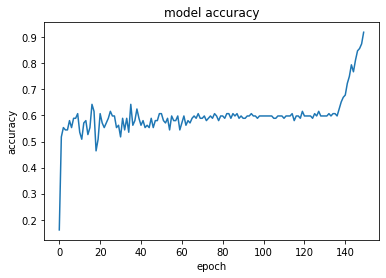

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## 9) Prediction on Test Set

In [0]:
model.load_weights(modelname)
pred_results = model.predict(([inputs_test, queries_test]))

In [75]:
len(pred_results)

12

In [76]:
' '.join(test_data[0][0])

'i put out my hand and felt the meat chopper hanging to the wall . in a flash i was after him . i was fierce with fear . before he was halfway across the kitchen i had overtaken him . with one last touch of humanity i turned the blade back and struck the curate with the meat chopper . curate went headlong forward and lay stretched on the ground . i stumbled over curate and stood panting . he lay still .'

In [58]:
test_data[0][1]

['did', 'curate', 'went', 'headlong', 'forward', '?']

In [59]:
test_data[0][2]

'yes'

In [60]:
pred_results[0]   # Probability of occurence of each word from vocab in the answer.

array([1.33856361e-07, 1.04094944e-07, 9.58991322e-08, ...,
       1.23092661e-07, 1.13178956e-07, 1.32650385e-07], dtype=float32)

In [61]:
# Generating prediction from model

val_max = np.argmax(pred_results[0])
val_max

1437

In [62]:

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.6539801


In [63]:
for res in pred_results:
  print(res)
  break

[1.33856361e-07 1.04094944e-07 9.58991322e-08 ... 1.23092661e-07
 1.13178956e-07 1.32650385e-07]


In [0]:
actual_results = ['yes','yes','no','yes','no','yes','no','yes','no','no','yes','yes',]

In [0]:
# Checking for all the test data set
ans = []
for result in pred_results:

  val_max = np.argmax(result)

  for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

  ans.append(k)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ans,actual_results)*100
accuracy = float("{:.2f}".format(accuracy))
print(f'Accuracy: {accuracy}%')

Accuracy: 91.67%


# <CENTER> THE END